<a href="https://colab.research.google.com/github/ddongparifire/public/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data source:World Happiness Report up to 2023 (Kaggle)**

https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023


**Context**

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**Content**


The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Step 1: Mount Google Drive

 Mount your Google Drive to access the files:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then, navigate to the dataset directory:

In [ ]:
import os
path = "/content/drive/My Drive/UM/MADS/SIADS521 - Visual Exp of Data/Assignment 3/Dataset/"
os.listdir(path)  # List files in the directory

['countryContinent.csv',
 'world_country_and_usa_states_latitude_and_longitude_values.csv',
 'WHR2023.csv']

Load the dataset:

In [ ]:
import pandas as pd
# Load CSV files
df = pd.read_csv(path + "WHR2023.csv")


Step 2: Verify & Clean the Data

In [ ]:
# Verify that data is loaded correctly
print(df.head())


  Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250            

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Show the missing values
print(missing_values)

Healthy life expectancy                  1
Explained by: Healthy life expectancy    1
Dystopia + residual                      1
dtype: int64


It looks like your dataset has only a few missing values:

	•	Healthy life expectancy: 1 missing value
	•	Explained by: Healthy life expectancy: 1 missing value
	•	Dystopia + residual: 1 missing value

Since dataset has only three missing values and they are all in numerical columns, I will fill them with the median of their respective columns. The median is robust to outliers and ensures that your dataset remains consistent without losing data.


In [ ]:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True) # apply .median() only to numeric columns.

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Show the missing values
print(missing_values)

Series([], dtype: int64)


Now No missing value in the dataset.

In [ ]:
print(df.dtypes)

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

Dataset’s column data types look well-structured, with categorical data (Country name) as object and all numerical data as float64.  

If the column names are too long, we can shorten them while keeping them understandable. Here’s a cleaner version of the column names:

 Shorten Column Names

In [ ]:
# Rename columns for clarity
df.rename(columns={
    "Country name": "Country",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Life_Exp",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Corruption",
    "Ladder score in Dystopia": "Dystopia",
    "Dystopia + residual": "Dystopia_Res"
}, inplace=True)

# Drop unnecessary statistical columns
columns_to_drop = [
    "Standard error of ladder score",  # SE_Ladder (statistical uncertainty)
    "upperwhisker", "lowerwhisker",  # Whisker values (not needed for visualization)
    "Dystopia_Res",  # Statistical measure, not an actual factor
    # "Explained by" factors (breakdown of happiness score, redundant for visualization)
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption"
]

# Drop the selected columns
df.drop(columns=columns_to_drop, inplace=True)

` Exploratory Data Analysis (EDA)`

Statistics Sumary

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())  # Compute correlation only on numeric data

                Happiness       GDP  Social_Support  Life_Exp   Freedom  \
Happiness        1.000000  0.784367        0.834532  0.745396  0.662924   
GDP              0.784367  1.000000        0.738069  0.835638  0.451439   
Social_Support   0.834532  0.738069        1.000000  0.725402  0.541630   
Life_Exp         0.745396  0.835638        0.725402  1.000000  0.413066   
Freedom          0.662924  0.451439        0.541630  0.413066  1.000000   
Generosity       0.044082 -0.156456        0.036574 -0.135646  0.170229   
Corruption      -0.471911 -0.436961       -0.272490 -0.403079 -0.383786   
Dystopia              NaN       NaN             NaN       NaN       NaN   

                Generosity  Corruption  Dystopia  
Happiness         0.044082   -0.471911       NaN  
GDP              -0.156456   -0.436961       NaN  
Social_Support    0.036574   -0.272490       NaN  
Life_Exp         -0.135646   -0.403079       NaN  
Freedom           0.170229   -0.383786       NaN  
Generosity        

In [ ]:
print(df["Dystopia"].unique())

[1.778]


In [ ]:
print(df.columns)

Index(['Country', 'Happiness', 'GDP', 'Social_Support', 'Life_Exp', 'Freedom',
       'Generosity', 'Corruption', 'Dystopia'],
      dtype='object')


An issue identified: The issue is that the Dystopia column contains only a single unique value, 1.778, for all rows. This means that there is no variation in the data, which causes pandas to return NaN in correlation calculations. In statistics, correlation measures how two variables move together—since Dystopia never changes, it has no meaningful correlation with any other column.

Drop the Dystopia column (since it provides no useful information):

In [ ]:
df.drop(columns=["Dystopia"], inplace=True)

Re-run your correlation analysis:

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())

                Happiness       GDP  Social_Support  Life_Exp   Freedom  \
Happiness        1.000000  0.784367        0.834532  0.745396  0.662924   
GDP              0.784367  1.000000        0.738069  0.835638  0.451439   
Social_Support   0.834532  0.738069        1.000000  0.725402  0.541630   
Life_Exp         0.745396  0.835638        0.725402  1.000000  0.413066   
Freedom          0.662924  0.451439        0.541630  0.413066  1.000000   
Generosity       0.044082 -0.156456        0.036574 -0.135646  0.170229   
Corruption      -0.471911 -0.436961       -0.272490 -0.403079 -0.383786   

                Generosity  Corruption  
Happiness         0.044082   -0.471911  
GDP              -0.156456   -0.436961  
Social_Support    0.036574   -0.272490  
Life_Exp         -0.135646   -0.403079  
Freedom           0.170229   -0.383786  
Generosity        1.000000   -0.122653  
Corruption       -0.122653    1.000000  


Now that I've removed the Dystopia column, correlation matrix no longer has NaN values, which is great.

Now that dataset is cleaned, let’s visualize the correlations using a heatmap:

In [ ]:
print(df.columns)  # Check if names are shortened

Index(['Country', 'Happiness', 'GDP', 'Social_Support', 'Life_Exp', 'Freedom',
       'Generosity', 'Corruption'],
      dtype='object')


 Save the Cleaned Data

In [ ]:
cleaned_data_path = "/content/drive/My Drive/UM/MADS/SIADS521 - Visual Exp of Data/Assignment 3/Output/cleaned_happiness_2023.csv"
df.to_csv(cleaned_data_path, index=False)

**Correlation Heatmap**

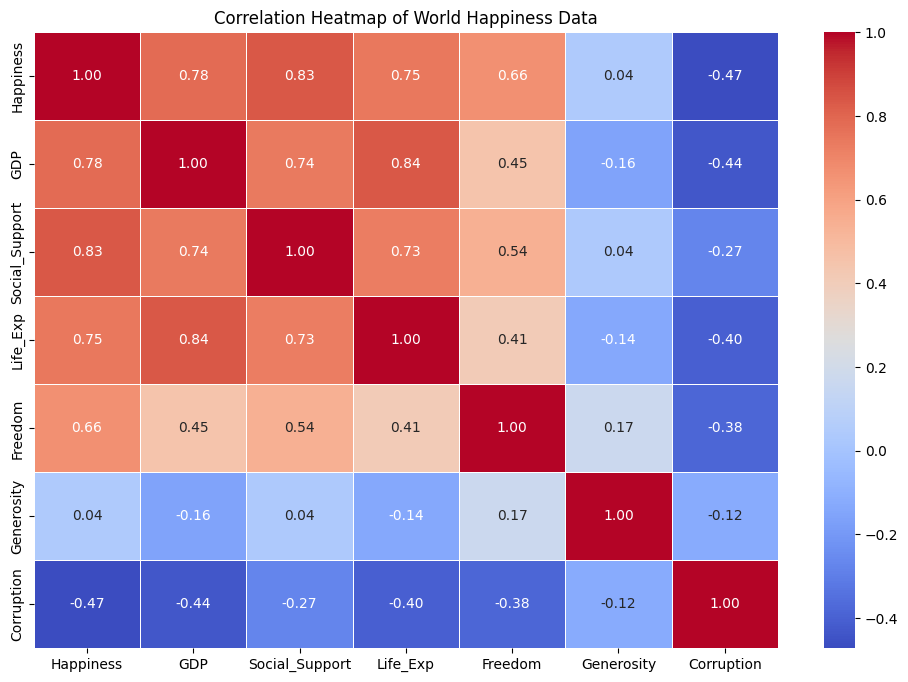

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of World Happiness Data")
plt.show()

**Bar Chart: Top 10 happiest and bottom 10 least happy countries**

<ipython-input-260-b96f38f30a45>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-260-b96f38f30a45>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




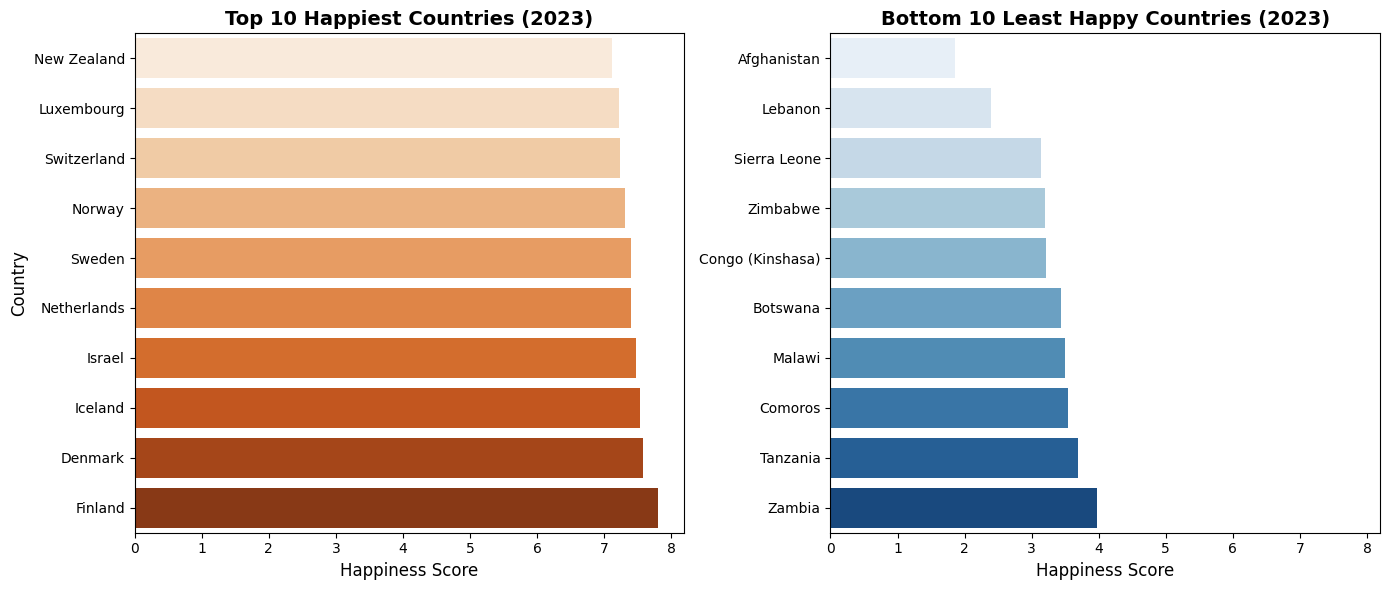

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check for missing values and drop them if necessary
df = df.dropna(subset=["Happiness", "Country"])

# Sort and select the top 10 happiest and bottom 10 least happy countries
top_10 = df.sort_values(by="Happiness", ascending=False).head(10)
bottom_10 = df.sort_values(by="Happiness", ascending=True).head(10)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Define distinct color palettes for better contrast
top_palette = sns.color_palette("Oranges", len(top_10))  # Warm colors for happier countries
bottom_palette = sns.color_palette("Blues", len(bottom_10))  # Cool colors for less happy countries

# Bar plot for top 10 happiest countries
sns.barplot(x="Happiness", y="Country", data=top_10, palette=top_palette, ax=axes[0],
            order=top_10.sort_values("Happiness").Country)
axes[0].set_title("Top 10 Happiest Countries (2023)", fontsize=14, fontweight="bold", loc="center")
axes[0].set_xlabel("Happiness Score", fontsize=12)
axes[0].set_ylabel("Country", fontsize=12)

# Bar plot for bottom 10 least happy countries
sns.barplot(x="Happiness", y="Country", data=bottom_10, palette=bottom_palette, ax=axes[1],
            order=bottom_10.sort_values("Happiness").Country)
axes[1].set_title("Bottom 10 Least Happy Countries (2023)", fontsize=14, fontweight="bold", loc="center")
axes[1].set_xlabel("Happiness Score", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Scatter Plot : Realationship of a variable with Happiness**

In [ ]:
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv(cleaned_data_path)

# Define variable for visualization
selected_var = "Social_Support"  # Default to Social Support

# Drop missing values to prevent errors
df = df.dropna(subset=[selected_var, "Happiness"])

# Ensure the selected variable and Happiness are numeric
df[selected_var] = pd.to_numeric(df[selected_var], errors="coerce")
df["Happiness"] = pd.to_numeric(df["Happiness"], errors="coerce")

# Create scatter plot
fig = px.scatter(
    df,
    x=selected_var,
    y="Happiness",
    hover_name="Country",
    color="Happiness",
    color_continuous_scale="RdBu_r",  # Red → Blue scale (Happy → Less happy)
    trendline="ols",  # Regression line
    title="Relationship Between Social Support and Happiness",
    labels={selected_var: "Social Support Score"}
)

# Update layout
fig.update_layout(
    title_x=0.5,  # Center the title
    height=600,   # Adjust height for better visibility
    coloraxis_colorbar=dict(title="Happiness Score")
)

# Show figure
fig.show()

**World Happiness Score Map**

In [ ]:
!pip install geopandas matplotlib pandas contextily # Install Dependencies

This code loads a happiness dataset, ensures proper continent assignment, checks for missing coordinates, and creates a choropleth map with a color scale  using Plotly, adjusting the map size and title formatting for better visualization.

In [ ]:
import pandas as pd
import plotly.express as px

# Check if 'latitude' exists in the dataset
print("Dataset Columns:", df.columns)

# Ensure 'Continent' is correctly assigned (drop duplicate columns)
if "Continent_x" in df.columns and "Continent_y" in df.columns:
    df.drop(columns=["Continent_x"], inplace=True)
    df.rename(columns={"Continent_y": "Continent"}, inplace=True)

# Create a choropleth map with reversed color scale (Blue for Happy → Red for Unhappy)
fig = px.choropleth(
    df,
    locations="Country",  # Column with country names
    locationmode="country names",  # Recognizing full country names
    color="Happiness",  # Color based on happiness score
    hover_name="Country",  # Show country names on hover
    color_continuous_scale=px.colors.diverging.RdBu[::-1],  # Reverse scale: Blue (Happy) → Red (Unhappy)
    title="🌍 World Happiness Score Map (2023)",
    projection="natural earth"  # Natural Earth projection
)

# Increase figure size and adjust title
fig.update_layout(
    width=1400,  # Larger width
    height=800,  # Larger height
    title_font=dict(size=24),  # Bigger title font
    margin=dict(l=50, r=50, t=80, b=50)  # Adjust margins for better spacing
)

# Show the map
fig.show()

Dataset Columns: Index(['Country', 'Happiness', 'GDP', 'Social_Support', 'Life_Exp', 'Freedom',
       'Generosity', 'Corruption'],
      dtype='object')


Dashbaord Code: This Dash web application visualizes the World Happiness Report (2023) using an interactive dashboard with a world map, a bar chart, and a scatter plot. Users can filter data by continent and adjust a happiness score threshold using a slider, which dynamically updates the map while keeping the color scale fixed. The bar chart displays the top and bottom five countries for a selected variable, and the scatter plot shows the relationship between happiness and other factors. The layout is optimized for better spacing, with the map at the top, followed by the slider, bar chart, and scatter plot.

In [ ]:
!pip install dash

**Interactive Dashboard**: This interactive Dash web application visualizes the World Happiness Report (2023) using three key visualizations: a world map, a bar chart, and a scatter plot, all accessible via separate tabs. Users can filter data by continent and adjust the happiness score threshold using a slider, which dynamically updates the world map while maintaining a consistent color scale. The bar chart highlights the top and bottom five countries for a selected variable, while the scatter plot illustrates the relationship between happiness and other factors, complete with a regression trendline. The layout is structured for clarity and ease of use, with an intuitive tabbed navigation system for exploring different insights efficiently

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load dataset
df = pd.read_csv(cleaned_data_path)

# Load country-to-continent mapping
continent_path = "/content/drive/My Drive/UM/MADS/SIADS521 - Visual Exp of Data/Assignment 3/Dataset/countryContinent.csv"
try:
    continent_df = pd.read_csv(continent_path, encoding="utf-8")
except UnicodeDecodeError:
    continent_df = pd.read_csv(continent_path, encoding="ISO-8859-1")

# Standardizing column names and merging continent info
continent_df.rename(columns={"country": "Country", "continent": "Continent"}, inplace=True)
df["Country"] = df["Country"].str.strip().str.lower()
continent_df["Country"] = continent_df["Country"].str.strip().str.lower()
df = df.merge(continent_df[["Country", "Continent"]], on="Country", how="left")

# Merge North America & South America as "Americas"
df["Continent"] = df["Continent"].replace({"North America": "Americas", "South America": "Americas"})
df.dropna(subset=["Continent"], inplace=True)

# Define variables for dropdown selection
variables = {
    "Happiness": "Happiness Score",
    "GDP": "GDP per Capita",
    "Social_Support": "Social Support",
    "Life_Exp": "Life Expectancy",
    "Freedom": "Freedom to Make Choices",
    "Generosity": "Generosity",
    "Corruption": "Perceptions of Corruption"
}

# Dropdown options for continents
continents = ["All"] + sorted(df["Continent"].unique())

# Initialize Dash app and **suppress callback exceptions**
app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.title = "World Happiness Dashboard"

# Layout with Tabs
app.layout = html.Div([
    # Sidebar
    html.Div([
        html.H2("🌍 World Happiness Report(2023)", style={"color": "white", "padding": "10px"}),
        html.Hr(style={"border": "1px solid white"}),

        html.P("Select a Variable:", style={"color": "white"}),
        dcc.Dropdown(
            id="variable-dropdown",
            options=[{"label": name, "value": var} for var, name in variables.items()],
            value="GDP",
            clearable=False,
            style={"width": "90%", "color": "black", "background-color": "white"}
        ),

        html.P("Filter by Continent:", style={"color": "white", "margin-top": "20px"}),
        dcc.Dropdown(
            id="continent-dropdown",
            options=[{"label": cont, "value": cont} for cont in continents],
            value="All",
            clearable=False,
            style={"width": "90%", "color": "black", "background-color": "white"}
        ),
    ], style={"width": "20%", "background-color": "#2C3E50", "padding": "20px", "height": "100vh", "position": "fixed", "color": "white"}),

    # Main Content with Tabs
    html.Div([
        dcc.Tabs(id="tabs", value="map", children=[
            dcc.Tab(label="🌍 World Happiness Score Map", value="map"),
            dcc.Tab(label="📊 Top 5 & Bottom 5", value="bar"),
            dcc.Tab(label="📉 Relationship with Happiness", value="scatter")
        ], style={"margin-bottom": "20px"}),

        html.Div(id="tab-content")
    ], style={"margin-left": "20%", "padding": "10px"})
])

# Callback to update tab content dynamically
@app.callback(
    Output("tab-content", "children"),
    Input("tabs", "value")
)
def display_selected_tab(selected_tab):
    if selected_tab == "map":
        return html.Div([
            html.H3("🌍 World Happiness Score Map (2023)", style={"text-align": "center", "margin-bottom": "3px"}),
            html.P("ℹ️ Hover over a country to see its Happiness Score",
                   style={"text-align": "center", "color": "gray", "font-size": "14px", "margin-top": "0px"}),
            dcc.Graph(id="happiness-map", style={"height": "600px", "width": "90%", "margin": "auto"}),
            html.Div([
                html.P("Filter Happiness Score Threshold:", style={"text-align": "center", "font-weight": "bold", "margin-bottom": "5px"}),
                dcc.Slider(
                    id="happiness-slider",
                    min=df["Happiness"].min(),
                    max=df["Happiness"].max(),
                    step=0.1,
                    value=df["Happiness"].max(),
                    marks={i: str(i) for i in range(int(df["Happiness"].min()), int(df["Happiness"].max()) + 1)}
                )
            ], style={"width": "70%", "margin": "10px auto"})
        ])
    elif selected_tab == "bar":
        return html.Div([
            html.H3("📊 Top 5 & Bottom 5", style={"text-align": "center", "margin-bottom": "3px"}),
            dcc.Graph(id="bar-chart", style={"width": "80%", "height": "450px", "margin": "auto"})
        ])
    elif selected_tab == "scatter":
        return html.Div([
            html.H3("📉 Relationship with Happiness", style={"text-align": "center", "margin-bottom": "3px"}),
            dcc.Graph(id="scatter-plot", style={"width": "80%", "height": "500px", "margin": "auto"})
        ])
    return dash.no_update

# **World Map Update**
@app.callback(
    Output("happiness-map", "figure"),
    [Input("continent-dropdown", "value"), Input("happiness-slider", "value")]
)
def update_map(selected_continent, happiness_threshold):
    filtered_df = df if selected_continent == "All" else df[df["Continent"] == selected_continent]
    filtered_df = filtered_df[filtered_df["Happiness"] <= happiness_threshold]

    fig = px.choropleth(
        filtered_df,
        locations="Country",
        locationmode="country names",
        color="Happiness",
        hover_name="Country",
        hover_data={"Happiness": True},
        color_continuous_scale=px.colors.diverging.RdBu[::-1],
        range_color=[df["Happiness"].min(), df["Happiness"].max()]
    )

    fig.update_layout(
        geo=dict(scope="world", projection=go.layout.geo.Projection(type="natural earth")),
        margin=dict(l=40, r=40, t=30, b=20),
        coloraxis_colorbar=dict(title="Happiness Score", len=0.8)
    )
    return fig

# **Bar Chart Update**
@app.callback(
    Output("bar-chart", "figure"),
    [Input("variable-dropdown", "value"), Input("continent-dropdown", "value")]
)
def update_bar_chart(selected_var, selected_continent):
    filtered_df = df if selected_continent == "All" else df[df["Continent"] == selected_continent]
    sorted_df = filtered_df.sort_values(by=selected_var, ascending=False)
    top_5, bottom_5 = sorted_df.head(5), sorted_df.tail(5)

    fig = go.Figure()
    fig.add_trace(go.Bar(y=bottom_5["Country"], x=bottom_5[selected_var], orientation="h", marker=dict(color="blue"), name="Bottom 5"))
    fig.add_trace(go.Bar(y=top_5["Country"], x=top_5[selected_var], orientation="h", marker=dict(color="red"), name="Top 5"))

    fig.update_layout(title="Top 5 & Bottom 5", xaxis_title=selected_var, yaxis_title="Country", height=450)
    return fig

# **Scatter Plot Update (Restoring Regression Line)**
@app.callback(
    Output("scatter-plot", "figure"),
    [Input("variable-dropdown", "value"), Input("continent-dropdown", "value")]
)
def update_scatter(selected_var, selected_continent):
    filtered_df = df if selected_continent == "All" else df[df["Continent"] == selected_continent]

    fig = px.scatter(
        filtered_df, x=selected_var, y="Happiness", hover_name="Country",
        color="Happiness", color_continuous_scale="RdBu_r", trendline="ols"
    )

    fig.update_layout(title=f"{variables[selected_var]} vs Happiness", title_x=0.5)
    return fig

# Run app
if __name__ == "__main__":
    app.run(debug=True)

<IPython.core.display.Javascript object>